In [10]:
import pandas as pd
import numpy as np
import tensorflow as tf
import sklearn
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
import cv2
import os
%matplotlib inline

In [11]:
from keras import layers
from keras.models import Sequential

In [12]:
dataset_url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower photos",origin=dataset_url,cache_dir=".",untar=True)

In [13]:
data_dir

'./datasets/flower photos'

In [14]:
import pathlib
data_dir = pathlib.Path('/content/datasets/flower_photos')
data_dir

PosixPath('/content/datasets/flower_photos')

In [15]:
list(data_dir.glob("*/*.jpg"))

[PosixPath('/content/datasets/flower_photos/sunflowers/184683023_737fec5b18.jpg'),
 PosixPath('/content/datasets/flower_photos/sunflowers/14472246629_72373111e6_m.jpg'),
 PosixPath('/content/datasets/flower_photos/sunflowers/6606741847_f0198d83ff.jpg'),
 PosixPath('/content/datasets/flower_photos/sunflowers/15054750690_198b6ab0f2_n.jpg'),
 PosixPath('/content/datasets/flower_photos/sunflowers/18766965343_9f42d4bedc_m.jpg'),
 PosixPath('/content/datasets/flower_photos/sunflowers/23894449029_bf0f34d35d_n.jpg'),
 PosixPath('/content/datasets/flower_photos/sunflowers/4664737020_b4c61aacd3_n.jpg'),
 PosixPath('/content/datasets/flower_photos/sunflowers/6112510436_9fe06e695a_n.jpg'),
 PosixPath('/content/datasets/flower_photos/sunflowers/22429946721_e17a12cb39_n.jpg'),
 PosixPath('/content/datasets/flower_photos/sunflowers/2706736074_b0fba20b3e.jpg'),
 PosixPath('/content/datasets/flower_photos/sunflowers/9445830851_e9a126fd1d_n.jpg'),
 PosixPath('/content/datasets/flower_photos/sunflowers/4

In [16]:
len(list(data_dir.glob("*/*.jpg")))

3670

In [17]:
roses = list(data_dir.glob("roses/*"))
roses[:5]

[PosixPath('/content/datasets/flower_photos/roses/4910094611_8c7170fc95_n.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/15977362155_461030c196_m.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/14019883858_e5d2a0ec10_n.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/4267024012_295e7141a3_n.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/898102603_2d5152f09a.jpg')]

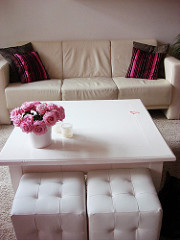

In [18]:
PIL.Image.open(str(roses[5]))

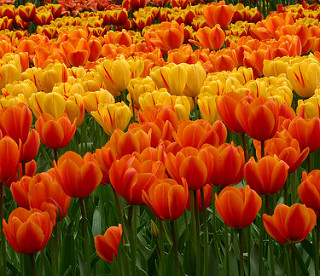

In [19]:
tulip = list(data_dir.glob("tulips/*"))
PIL.Image.open(str(tulip[0]))

In [20]:
flower_images_dict = {
    "roses" : list(data_dir.glob("roses/*")),
    "daisy" : list(data_dir.glob("daisy/*")),
    "dandelion" : list(data_dir.glob("dandelion/*")),
    "sunflowers" : list(data_dir.glob("sunflowers/*")),
    "tulips" : list(data_dir.glob("tulips/*")),
}

In [21]:
flower_images_dict["roses"]

[PosixPath('/content/datasets/flower_photos/roses/4910094611_8c7170fc95_n.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/15977362155_461030c196_m.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/14019883858_e5d2a0ec10_n.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/4267024012_295e7141a3_n.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/898102603_2d5152f09a.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/3102535578_ec8c12a7b6_m.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/3415176946_248afe9f32.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/3667366832_7a8017c528_n.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/3407482427_49d5c75291_m.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/4609168052_3d4e1d3804_n.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/3276552939_8c31b22d3e.jpg'),
 PosixPath('/content/datasets/flower_photos/roses/14943194730_f48b4d4547_n.jpg'),
 PosixPath('/content/datasets/fl

In [22]:
flowers_labels_dict = {
    "roses" : 0,
    "daisy" : 1,
    "dandelion" : 2,
    "sunflowers" : 3,
    "tulips" : 4,
}

In [23]:
str(flower_images_dict["roses"][0])

'/content/datasets/flower_photos/roses/4910094611_8c7170fc95_n.jpg'

In [24]:
img = cv2.imread(str(flower_images_dict["roses"][0]))
img.shape

(240, 320, 3)

In [25]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [26]:
X , y = [] , []

for flower_name , images in flower_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [27]:
y[:5]

[0, 0, 0, 0, 0]

In [28]:
X[:1]

[array([[[19, 31,  9],
         [32, 48, 19],
         [43, 65, 27],
         ...,
         [42, 55, 23],
         [39, 53, 19],
         [47, 51, 15]],
 
        [[38, 55, 21],
         [44, 63, 25],
         [51, 74, 29],
         ...,
         [41, 49, 18],
         [41, 50, 18],
         [48, 51, 18]],
 
        [[60, 84, 34],
         [64, 89, 37],
         [67, 93, 39],
         ...,
         [54, 54, 20],
         [48, 54, 20],
         [52, 54, 22]],
 
        ...,
 
        [[ 2, 17,  4],
         [ 0, 12,  0],
         [ 0,  7,  0],
         ...,
         [62, 87, 62],
         [49, 72, 57],
         [38, 61, 53]],
 
        [[10, 39, 17],
         [ 2, 24,  7],
         [ 2, 11,  2],
         ...,
         [59, 84, 60],
         [46, 70, 55],
         [39, 61, 55]],
 
        [[21, 62, 33],
         [10, 40, 18],
         [ 6, 20,  9],
         ...,
         [55, 81, 57],
         [45, 68, 54],
         [40, 63, 56]]], dtype=uint8)]

In [29]:
X = np.array(X)
y = np.array(y)

In [30]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=0)

In [31]:
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(2752, 918, 2752, 918)

In [32]:
X_train_scaled  = X_train / 255
X_test_scaled = X_test / 255

In [33]:
from tensorflow import keras
from keras import layers
import tensorflow as tf
num_classes = 5

model = keras.Sequential([
    layers.Conv2D(16,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(32,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),

    ## Dense
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(num_classes)

])


model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [34]:
model.fit(X_train,y_train,epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.2613 - loss: 111.5369
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4934 - loss: 1.2749
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6625 - loss: 0.9073
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8017 - loss: 0.5906
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8910 - loss: 0.3321
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9376 - loss: 0.2309
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9592 - loss: 0.1502
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9696 - loss: 0.1176
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9854 - loss: 0.0680
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.9619 - loss: 0.1256
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9723 - loss: 0.0974
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accurac

In [35]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.2473 - loss: 2.7111


[2.691380262374878, 0.24618735909461975]

In [36]:
predictions = model.predict(X_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


array([[-0.02987317, -0.01690044,  1.5701996 ,  0.02700954, -1.0029104 ],
       [ 0.03647809, -0.06378524,  1.8402997 ,  0.05956998, -1.0979433 ],
       [-0.04103843,  0.06676511,  1.9072887 ,  0.04780402, -1.2575879 ],
       ...,
       [-0.12815723,  0.08010498,  1.9988573 ,  0.03409734, -1.2350037 ],
       [-0.44866917, -0.1640234 ,  3.2899742 , -0.07663611, -1.3528354 ],
       [-0.03095541,  0.04153103,  2.3368995 ,  0.03497293, -1.3755183 ]],
      dtype=float32)

In [37]:
score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([0.11900633, 0.12056023, 0.5894851 , 0.12597196, 0.04497646],
      dtype=float32)>

In [38]:
np.argmax(score)

2

In [39]:
y_test[0]

1

# Data Augmentation

In [48]:
data_augmentation = keras.Sequential([
    layers.RandomRotation(0.9),
])

In [43]:
data_augmentation(X)[0]

<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
array([[[8.10434494e+01, 1.03941490e+02, 5.20013733e+01],
        [7.63114624e+01, 9.75145493e+01, 4.40076599e+01],
        [6.47230225e+01, 9.08198090e+01, 3.74316978e+01],
        ...,
        [5.00706558e+01, 5.89943848e+01, 2.14775467e+01],
        [3.40504074e+01, 4.90947151e+01, 1.85720177e+01],
        [2.93070221e+01, 4.50216904e+01, 1.78993759e+01]],

       [[8.29496918e+01, 1.12074951e+02, 5.57096672e+01],
        [8.00570221e+01, 1.06899307e+02, 4.73100891e+01],
        [7.23570480e+01, 1.04102707e+02, 4.44830666e+01],
        ...,
        [5.92917633e+01, 6.79442291e+01, 2.59524708e+01],
        [3.93851624e+01, 5.25892181e+01, 2.17959442e+01],
        [3.24169464e+01, 4.74612541e+01, 2.03185844e+01]],

       [[7.79970703e+01, 1.14938622e+02, 5.36215477e+01],
        [8.05016327e+01, 1.16631905e+02, 5.28158951e+01],
        [7.88112335e+01, 1.13883652e+02, 4.99607010e+01],
        ...,
        [6.75030594e+01, 7.12311

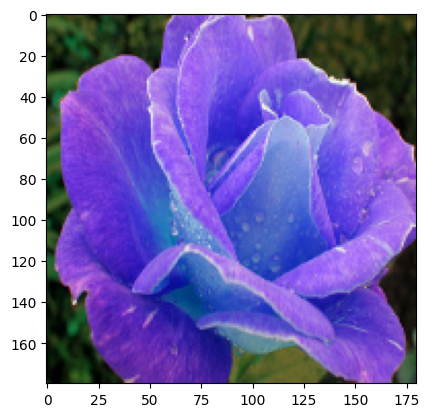

In [45]:
plt.imshow(X[0])

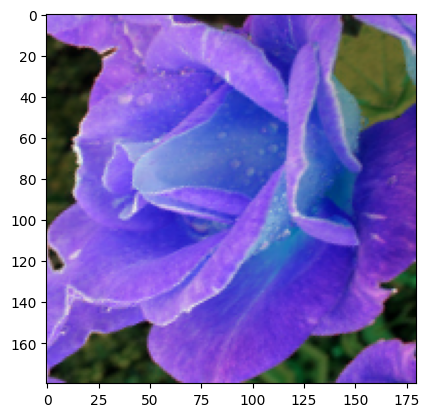

In [49]:
plt.imshow(data_augmentation(X)[0].numpy().astype("uint8"))

In [50]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal",input_shape=(180,180,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [51]:
from tensorflow import keras
from keras import layers
import tensorflow as tf
num_classes = 5

model = keras.Sequential([
    data_augmentation,
    layers.Conv2D(16,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(32,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),

    layers.Conv2D(64,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),

    layers.Dropout(0.2),

    ## Dense
    layers.Flatten(),
    layers.Dense(128,activation="relu"),
    layers.Dense(num_classes)

])


model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [52]:
model.fit(X_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - accuracy: 0.3417 - loss: 1.6680
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - accuracy: 0.5377 - loss: 1.1390
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5982 - loss: 0.9984
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.6360 - loss: 0.9258
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - accuracy: 0.6500 - loss: 0.8890
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.6856 - loss: 0.8046
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.7106 - loss: 0.7730
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.7216 - loss: 0.7411
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7308 - loss: 0.7059
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7350 - loss: 0.7035
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.7415 - loss: 0.6698
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy

In [53]:
predictions = model.predict(X_test_scaled)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [54]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7326 - loss: 0.8704


[0.9546798467636108, 0.7145969271659851]

In [60]:
np.argmax(predictions[12])

2

In [61]:
y_test[12]

2